# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#Открываем файл
df = pd.read_csv('real_estate_data.csv', sep=',', index_col=0) 
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
#Просмотр информации о наборе данных
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [3]:
#Описательная статистика для каждого столбца набора данных
df.describe() 

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

В таблице присутствуют 22 столбца с различными типами данных. Общая численность наблюдений - 23699 значений. Из информакции о таблицы видно, что в большинстве столбцов есть пропущенные значения. Заметим, что некоторые столбцы необходимо перекодировать в другой тип данных.

### Шаг 2. Предобработка данных

In [6]:
#Удаление дубликатов из таблицы
df.drop_duplicates().reset_index(drop=True).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
#Заполнение пропущенных значений в столбце kitchen_area
total_median = df['total_area'].median()
kitchen_median = df['kitchen_area'].median()
living_median = df['living_area'].median()
kitchen_total_ratio = kitchen_median / total_median
living_total_ratio = living_median / total_median
def count_kitchen_area (row):
    total = row['total_area']
    living = row['living_area']
    kitchen = row['kitchen_area']
    if (living > 0) & (pd.isna(kitchen)):
        return total - living
    elif (pd.isna(kitchen)) & (pd.isna(living)):
        return total*kitchen_total_ratio
    else:
        return kitchen
df['kitchen_area'] = df.apply(count_kitchen_area, axis = 1)

In [6]:
#Заполнение пропусков в столбце living_area числовым значением относительно заполненных значений в столбцах total_area и kitchen_area
def count_living_area (row): 
    total = row['total_area']
    living = row['living_area']
    kitchen = row['kitchen_area']
    if (kitchen > 0) & (pd.isna(living)):
        return total - kitchen
    elif (pd.isna(kitchen)) & (pd.isna(living)):
        return total*living_total_ratio
    else:
        return living
df['living_area'] = df.apply(count_living_area, axis = 1)

In [7]:
#Заполнение пропусков в столбце locality_name значением "нет данных" 
df['locality_name'] = df['locality_name'].fillna('Нет данных') 

In [8]:
#Заполнение пропусков в столбце floor_total согласно медианному значению в районе
floors_medians = df.groupby('locality_name')['floors_total'].median()
for locality in floors_medians.index:
    df.loc[(df['locality_name'] == locality) & (df['floors_total'].isna()), 'floors_total'] = df.loc[(df['locality_name'] == locality) & (df['floors_total'].isna()), 'floors_total'].fillna(floors_medians[locality])  

In [9]:
#Заполнение пропусков в столбце ceiling_height медианным значением
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median()) 

In [10]:
#Заполнение пропусков в столбцах airport_nearest и cityCenter_nearest медианным значением
df['airports_nearest'] = df['airports_nearest'].fillna(df['airports_nearest'].median()) 
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(df['cityCenters_nearest'].median())

In [11]:
#Заполнение значений в столбцах "0"
df['parks_around3000'] = df['parks_around3000'].fillna(0) 
df['parks_nearest'] = df['parks_nearest'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
df['ponds_nearest'] = df['ponds_nearest'].fillna(0)

In [12]:
#Удаление из названий 
drop_text = ['посёлок', 'поселок', 'деревня', 'городского', 'типа', 'село', 'коттеджный', ' '] 
for element in drop_text:
    df['locality_name'].replace(element, '', inplace=True, regex=True)

In [13]:
#Заполнение значений "0"
df['balcony'] = df['balcony'].fillna(0) 

In [14]:
#Заполнение значений "False"
df['is_apartment'] = df['is_apartment'].fillna(False) 

In [15]:
#Посмотрим количество дубликатов
df.duplicated().sum() 

0


In [16]:
#Добавим столбец с ценой в миллионах 
df['last_price_mln'] = df['last_price'] / 1000000 

In [17]:
# Перевод столбцов в другой формат
df['last_price'] = df['last_price'].astype('int') 
df['floors_total'] = df['floors_total'].astype('int')
df['balcony'] = df['balcony'].astype('int')
df['parks_around3000'] = df['parks_around3000'].astype('int')
df['ponds_around3000'] = df['ponds_around3000'].astype('int')

In [18]:
#Перевод столбца с датой к классическому формату
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') 

In [19]:
#Просмотр информации по набору данных
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     23699 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null float64
ponds_around300

### Вывод

В рамках предобработки данных были выполнены следующие действия:
1) Произведена замена пустых значений из столбца locality_name на наименование "Нет данных", так как эти данные необходимы для дальнейшего анализа, удалять эти строки нельзя.
2) В столбце floors_total пустые значения были заменены на медиальные значения в рамках одного района из столбца locality_name, так как этот метод наиболее корректно позволяет заполнить пустые значения.
3) Заменены значения в столбце ceiling_height на медиальное значение по всему столбцу, так как в среднем высота потолка одинакова для всех квартир в рамках погрешности.
4) Были заполнены пропуски в столбцах kitchen_area и living_area медиальными значениями в зависимости от количества комнат в квартире, так как обычно чем больше комнат, тем больше жилая площадь и площадь кухни соответственно.
5) В столбце locality_name были удалены значения 'посёлок', 'поселок', 'деревня', 'городского', 'типа', 'село', 'коттеджный', в строках, чтобы были представлены кооректные данные без дублирования значений.
6) В столбце balcony пропущенные значения были заменены на 0, так как если это значения не было заполнено, скорее всего балкона в квартире нет.
7) По такой же логике были изменены значения в столбце is_apartament, так как если человек не указал это, то скорее всего это не Апартаменты. 
8) Дубликатов в таблице найдено не было.
9) Был изменен формат даты в столбце first_day_exposition в формат datetime.
10) Значения в столбцах 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest' заполнены нулевыми значениями.
11) В столбцах 'last_price', 'floors_total', 'balcony', 'parks_around3000', 'ponds_around3000'  был изменен тип данных на 'int', так как в рамках таблицы нам необходимы целочисленные значения. 
В столбце days_exposition также нельзя заполнить пустые значения медиальными, так как есть вероятность, что объявление еще актуально. Возможно, было бы логично заполнить этот столбец как разницу между начальной датой размещения и датой формирования данных, но у нас нет даты формирования таблицы. 

### Шаг 3. Посчитайте и добавьте в таблицу

In [20]:
#Найдем среднюю цену за квадратный метр
df['price_per_square_meter'] = df['last_price'] / df['total_area'] 
df['price_per_square_meter'] = df['price_per_square_meter'].round(2)
df['price_per_square_meter'].sort_values(ascending=False)

12971    1907500.00
1436     1736842.11
22831    1542604.80
14706    1000748.13
4996      995983.94
            ...    
9581       10368.66
11351      10185.19
4405        9615.38
14911       7962.96
8793         111.83
Name: price_per_square_meter, Length: 23699, dtype: float64


In [21]:
#Найдем день недели
df['weekday'] = (df['first_day_exposition']).dt.weekday
#Найдем месяц
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month
#Найдем год
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year 

In [22]:
#Напишем функцию, которая определяет статус этажа
def floor_level(row): 
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
df['floor_level'] = df.apply(floor_level, axis = 1)
df['floor_level'].value_counts()

другой       17441
последний     3341
первый        2917
Name: floor_level, dtype: int64


In [23]:
#Найдем отношение жилой площади к общей площади недвижимости
df['living_total_ratio'] = df['living_area'] / df['total_area'] 
#Найдем отношение площади кухни к общей площади недвижимости
df['kitchen_total_ratio'] = df['kitchen_area'] / df['total_area'] 

In [24]:
#Сортировка значений по столбцу living_total_ratio
df['living_total_ratio'].sort_values(ascending=False) 

12691    1.000000
9861     1.000000
10606    0.989315
20256    0.983447
15513    0.975754
           ...   
21758    0.086957
3242     0.073171
21943    0.069588
13915    0.038462
23574    0.021583
Name: living_total_ratio, Length: 23699, dtype: float64
21758    0.913043
8094     0.803618
11579    0.787879
17582    0.772727
1407     0.739837
           ...   
3365     0.025381
20256    0.016553
10606    0.010685
9861     0.000000
12691    0.000000
Name: kitchen_total_ratio, Length: 23699, dtype: float64


In [ ]:
# Сортировка значений по столбцу kithcen_total_ratio
df['kitchen_total_ratio'].sort_values(ascending=False)

In [25]:
df.head() 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,last_price_mln,price_per_square_meter,weekday,month,year,floor_level,living_total_ratio,kitchen_total_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000,8,False,...,755.0,NaN,13.000,120370.37,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600,1,False,...,0.0,81.0,3.350,82920.79,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300,4,False,...,574.0,558.0,5.196,92785.71,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.65,14,131.175,9,False,...,234.0,424.0,64.900,408176.10,4,7,2015,другой,0.825000,0.175000
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000,13,False,...,48.0,121.0,10.000,100000.00,1,6,2018,другой,0.320000,0.410000


### Вывод

В результате проведенных действий были рассчитаны столбцы living_total_ratio и kitchen_total_ratio. Объяснить сильно выделяющие значения в этих столбцах можно значением open_plan, так как квартира со свободной планировкой может быть как совсем без кухни и она не будет учитываться как в площади кухни, так и будет добавлена в жилую площадь.
В таблице присутствуют 3341 объекта недвижимости, которые находятся на последнем этаже, а также 2917 объекта на первом этаже.
Самая дорогая цена 1907500 руб/метр. 

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

### Изучение параметров: площадь, цена, число комнат, высота потолков.

In [26]:
# Вывод описательной статистики столбца с общей площадью
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64
45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
129.70      1
192.30      1
151.17      1
154.70      1
23.55       1
Name: total_area, Length: 2182, dtype: int64


In [ ]:
df['total_area'].value_counts().sort_values(ascending=False)

In [27]:
# Вывод описательной статистики столбца с ценой
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64
4500000     342
3500000     291
4300000     260
4000000     260
4200000     259
           ... 
2235000       1
6970000       1
19471000      1
20700000      1
590000        1
Name: last_price, Length: 2978, dtype: int64


In [ ]:
df['last_price'].value_counts().sort_values(ascending=False)

In [28]:
# Вывод описательной статистики столбца с количеством комнат
df['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64
1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
16       1
19       1
12       1
15       1
Name: rooms, dtype: int64


In [ ]:
df['rooms'].value_counts().sort_values(ascending=False)

In [29]:
# Вывод описательной статистики столбца с высотой потолков
df['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64
2.65      9871
2.50      3515
2.60      1646
2.70      1574
3.00      1112
          ... 
3.93         1
5.00         1
14.00        1
2.25         1
100.00       1
Name: ceiling_height, Length: 183, dtype: int64


In [ ]:
df['ceiling_height'].value_counts().sort_values(ascending=False)

### Построение гистограммы для параметров: площадь, цена, число комнат, высота потолков.

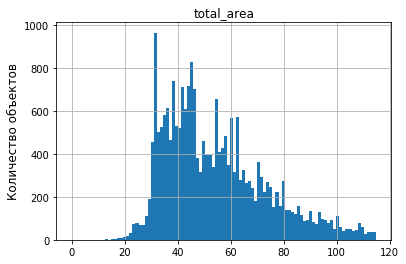

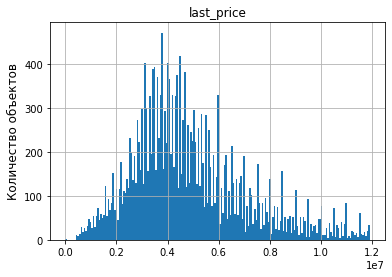

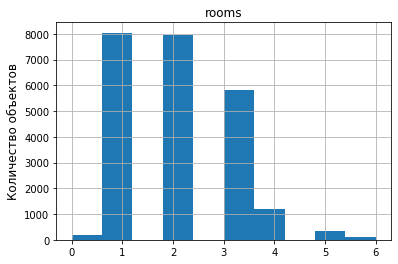

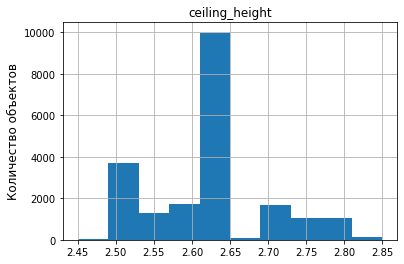

In [30]:
dict_for_auto = {
    'total_area' : [100, (0,500)],
    'last_price' : [200, (100, 8000000)],
    'rooms' : [10, (0, 20)],
    'ceiling_height' : [10, (0, 3)]
}

for column in dict_for_auto.keys():
    quantiles = df[column].quantile([0.25, 0.75])
    iqr = quantiles.iloc[1] - quantiles.iloc[0]
    df[column].hist(bins = dict_for_auto[column][0], range = (max(0, quantiles.iloc[0] - 1.5 * iqr), quantiles.iloc[1] + 1.5 * iqr))
    plt.ylabel('Количество объектов', fontsize=12)
    plt.title(column)
    plt.show()

### Изучение времени продажи квартиры. Построение графиков Диаграммы размаха. 

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64
Среднее время размещения объявления: 181 дней
Медиана времени размещения объявления: 95.0 дней


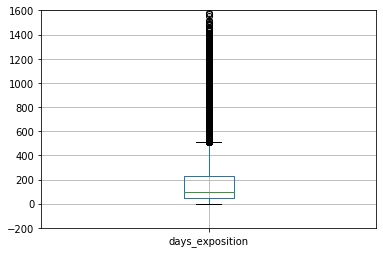

In [31]:
# Вывод описательной статистики столбца дней выставления объявления
df['days_exposition'].describe()


In [ ]:
print("Среднее время размещения объявления: {:.0f} дней".format(df['days_exposition'].mean()))
print("Медиана времени размещения объявления: {} дней".format(df['days_exposition'].median()))

In [ ]:
df.boxplot(column='days_exposition')
plt.ylim(-200, 1600)
plt.show()

Обычно время продажи квартиры занимает 181 день, о чем символизирует среднее значение. Быстрыми продажами квартиры можно считать, если квартира была продана в период до 45 дней, о чем свидетельствует граница первого квантиля (25%). Долгой продажей считается, если квартира продана после 232 дней с момента размещения объявления, о чем свидетельствует граница 3 квантиля (75%).

### Удаление редких и выбивающихся значений.

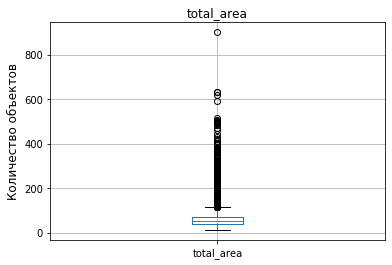

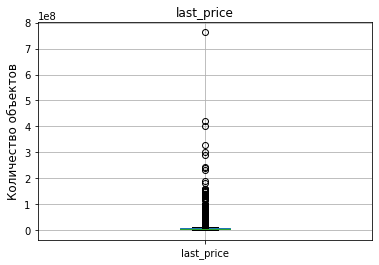

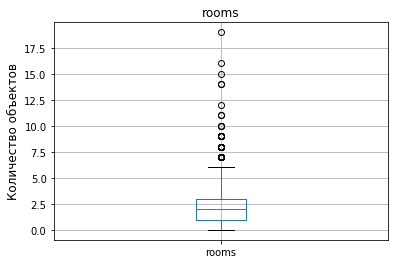

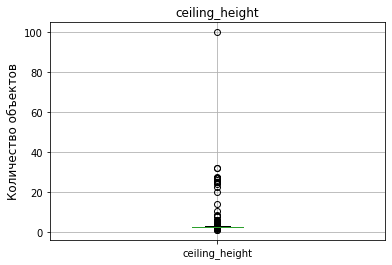

In [32]:
dict_columns = ['total_area', 'last_price', 'rooms', 'ceiling_height']

for column in dict_columns:
    quantiles = df[column].quantile([0.25, 0.75])
    iqr = quantiles.iloc[1] - quantiles.iloc[0]
    df.boxplot(column=column)
    plt.ylabel('Количество объектов', fontsize=12)
    plt.title(column)
    plt.show()

In [33]:
choose_columns = ['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']
for column in choose_columns:
    quantiles = df[column].quantile([0.25, 0.75])
    iqr = quantiles.iloc[1] - quantiles.iloc[0]
    top_quant = quantiles.iloc[1] + 1.5 * iqr
    bottom_quant =  max(0, quantiles.iloc[0] - 1.5 * iqr) 
    print('"Выбросами" в столбце {} можно считать значения, которые не входят в интервал от {:.2f} до {:.2f}'.format(column, bottom_quant, top_quant))

"Выбросами" в столбце total_area можно считать значения, которые не входят в интервал от 0.00 до 114.75
"Выбросами" в столбце last_price можно считать значения, которые не входят в интервал от 0.00 до 11900000.00
"Выбросами" в столбце rooms можно считать значения, которые не входят в интервал от 0.00 до 6.00
"Выбросами" в столбце ceiling_height можно считать значения, которые не входят в интервал от 2.45 до 2.85
"Выбросами" в столбце days_exposition можно считать значения, которые не входят в интервал от 0.00 до 512.50


In [34]:
df_query = df.query('0 < total_area <= 114.75')
df_query = df_query.query('0 <= rooms <= 6')
df_query = df_query.query('0 < last_price <= 11900000')
df_query = df_query.query('2.45 <= ceiling_height <= 2.85')
df_query = df_query.query('0 <= days_exposition <= 512.50') 
df_query.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16083 entries, 1 to 23695
Data columns (total 30 columns):
total_images              16083 non-null int64
last_price                16083 non-null int64
total_area                16083 non-null float64
first_day_exposition      16083 non-null datetime64[ns]
rooms                     16083 non-null int64
ceiling_height            16083 non-null float64
floors_total              16083 non-null int64
living_area               16083 non-null float64
floor                     16083 non-null int64
is_apartment              16083 non-null bool
studio                    16083 non-null bool
open_plan                 16083 non-null bool
kitchen_area              16083 non-null float64
balcony                   16083 non-null int64
locality_name             16083 non-null object
airports_nearest          16083 non-null float64
cityCenters_nearest       16083 non-null float64
parks_around3000          16083 non-null int64
parks_nearest             

In [ ]:
print('Было сокращено {} значений.'.format(len(df) - len(df_query)))

В столбце столбце total_area можно заметить на диаграмме размаха резко выбивающиеся значения более 300 метров квадратных. Это может свидетельствовать как об элитной недвижимости, так и о загородной недвижимости. 
В столбце last_price выделяющими значениями могут считаться значения более 11900000 рублей. Довольно много значений более 20000000, что видно на диаграмме размаха. Можем предположить, что это так же элитная недвижимость.
В столбце rooms как на графике, так и по расчетам очевидно, что недвижимость с количеством комнат более 6 являются выбросами.
Особенностью в столбце ceiling_height является то, что существуют значения выше 10 м. Наверняка, что такие высокие потолки присутствуют в частных элитных домах. 
Такие значения можно сократить, так как они неадекватно влияют на набор данных.
Были удалены редкие и выбивающиеся значения в столбцах total_area, rooms, last_price, ceiling_height, days_exposition согласно диаграмме размаха, а также расчета межквартильного размаха. Было сокращено 7616 значений. 

### Влияние различных факторов на стоимость квартиры

In [7]:
last_price_total_area =  df_query.pivot_table(index='total_area', values='last_price', aggfunc={'count', 'mean'}).sort_values(by='mean')
last_price_rooms =  df_query.pivot_table(index='rooms', values='last_price', aggfunc={'count', 'median'}).sort_values(by = 'median')
last_price_cityCenters_nearest =  df_query.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='median').sort_values(by = 'last_price')
last_price_ceiling_height =  df_query.pivot_table(index='ceiling_height', values='last_price', aggfunc='median').sort_values(by = 'last_price').head()

data_for_plot = [last_price_total_area, last_price_rooms, last_price_cityCenters_nearest, last_price_ceiling_height]
for data in data_for_plot:
    data

NameError: name 'df_query' is not defined

In [ ]:
columns_for_plot = ['total_area', 'rooms', 'cityCenters_nearest', 'ceiling_height']
for column in columns_for_plot:
    df_query.plot(x=column, y='last_price', kind='scatter', alpha=0.4)
    plt.show()
    df_query.plot(x=column, y='last_price', kind='hexbin', gridsize=10, figsize=(6, 6), sharex=False, grid=True)
    plt.show()
    print('Коэффициент корреляции между {} и {}: {:.2f}.'.format(column, 'last_price', df_query[column].corr(df_query['last_price'])))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7cc5c482d0>,
      dtype=object)

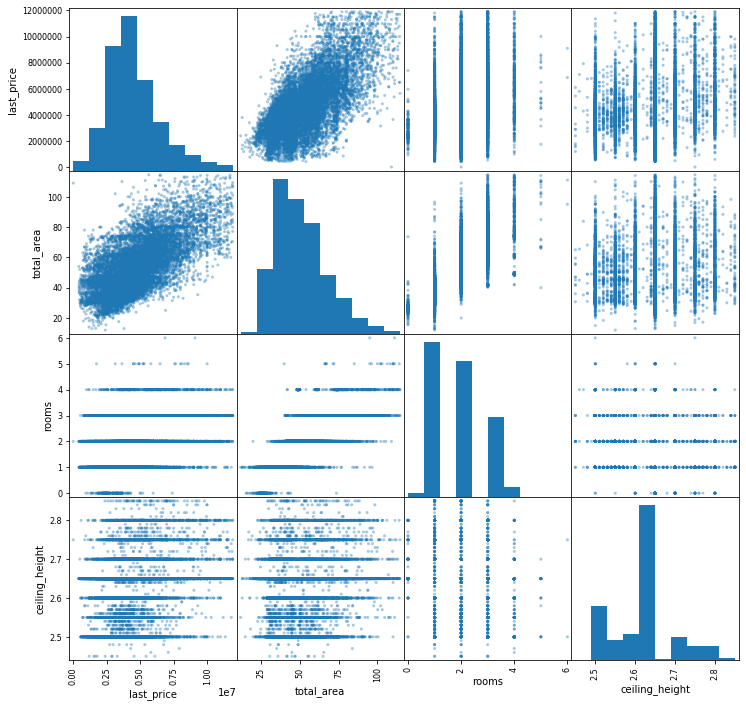

In [36]:
df_query_corr = pd.DataFrame(df_query, columns=['last_price', 'total_area', 'rooms', 'ceiling_height'])
pd.plotting.scatter_matrix(df_query_corr, alpha=0.4, figsize=(12, 12))

             last_price
floor_level            
первый          3550000
последний       3800000
другой          4350000


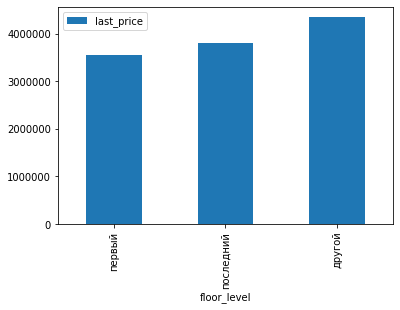

           last_price
weekday              
5        4.505565e+06
6        4.509911e+06
0        4.532892e+06
2        4.549032e+06
1        4.569122e+06
3        4.575757e+06
4        4.582085e+06


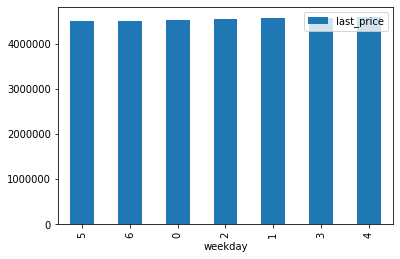

         last_price
month              
6      4.407954e+06
3      4.488357e+06
7      4.505137e+06
12     4.514869e+06
1      4.526203e+06
5      4.544657e+06
2      4.558168e+06
10     4.578008e+06
8      4.603029e+06
9      4.623929e+06
4      4.629570e+06
11     4.632003e+06


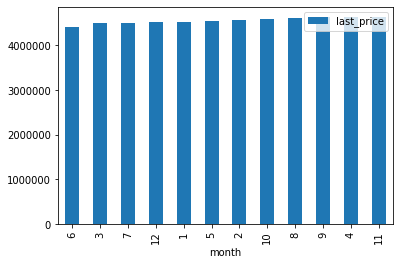

        last_price
year              
2018  4.516534e+06
2017  4.543562e+06
2016  4.546973e+06
2015  4.751727e+06
2019  4.820284e+06


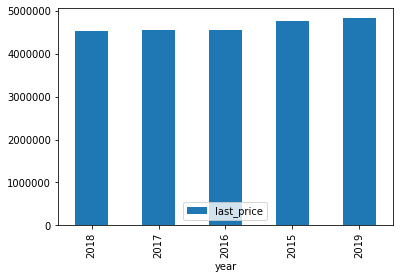

In [37]:
last_price_floor_level =  df_query.pivot_table(index='floor_level', values='last_price', aggfunc='median').sort_values(by = 'last_price')
last_price_weekday =  df_query.pivot_table(index='weekday', values='last_price', aggfunc='mean').sort_values(by = 'last_price')
last_price_month =  df_query.pivot_table(index='month', values='last_price', aggfunc='mean').sort_values(by = 'last_price')
last_price_year =  df_query.pivot_table(index='year', values='last_price', aggfunc='mean').sort_values(by = 'last_price')

data1_for_plot = [last_price_floor_level, last_price_weekday, last_price_month, last_price_year]
for data in data1_for_plot:
    data
    data.sort_values(by ='last_price').plot(y='last_price', kind='bar')
    plt.show()


### Вывод

Согласно графику диаграммы рассеяния между столбцами total_area и last_price можно заметить прямо пропорциональную зависимость между значениями. Коэффициент корреляции равен 0,69, что свидетельствует об умеренной связи между двумя показателями. Наиболшее количество значений находятся в области, где total_area равен 40, а last_price находится в облатси 4 млн. рублей (более 2000 значений).
Согласно графику диаграммы рассеяния между столбцами romms и last_price можно заметить, что в столбцах 1,2 и 3 комнатных квартир находистя наибольшее количество квартир. Коэффициент корреляции равен 0,42, что свидетельствует о слабой связи между двумя показателями. Наиболшее количество значений находятся в области, где rooms равен 1, а last_price находится в облатси 4 млн. рублей (более 3000 значений).
Согласно графику диаграммы рассеяния между столбцами cityCenter_nearest и last_price можно заметить обратно пропорциональную зависимость между значениями. Коэффициент корреляции равен -0,17, что свидетельствует об обратной слабой связи между двумя показателями. Наиболшее количество значений находятся в области, где cityCenter_nearest равен 12500 м, а last_price находится в облатси 5 млн. рублей (около 2500 значений).
Согласно графику диаграммы рассеяния между столбцами ceiling_height и last_price можно заметить прямо пропорциональную зависимость между значениями. Коэффициент корреляции равен 0,24, что свидетельствует о слабой связи между двумя показателями. Наиболшее количество значений находятся в области, где total_area равен 2.65, а last_price находится в облатси 4.5 млн. рублей (более 2500 значений).

Согласно столбчатой диаграмме floor_level можно четко пронаблюдать, что на первом этаже продаются квартиры с самой низкой стоимостью (3550000 рублей). Самыми высокими значениями обладают квартиры, находящиеся не на последнем и не на первом этаже 4350000 рублей.
В субботу и воскресенья размещаются объявления с самой низкой ценой объявлений, а в пятницу с самой высокой стоимостью. Объявления с самыми высокими стоимостями недвижимостями размещаются в коцне года 8, 9, 10, 11 месяц, объяснить это можно тем, что к концу года стоимость всего, в том числе квартир увеличивается. Стоимость квартир в 2019 году самая высокая относительно других годов, что может объясняться тем, что после ЧМ по футболу состоялся приток инвестиций в жилую недвижимость. 

### 10 населённых пунктов с наибольшим числом объявлений

In [38]:
df_query(
    .groupby('locality_name')
    .agg({'price_per_square_meter' : ['count', 'mean']})
    .sort_values(by=('price_per_square_meter', 'count'), ascending=False)
    .head(10))

price_per_square_meter               
                                 count           mean
locality_name                                        
Санкт-Петербург                  10055  103663.834894
Мурино                             513   85969.953021
Кудрово                            403   94594.872854
Шушары                             382   77901.216126
Всеволожск                         294   66712.283333
Парголово                          287   89336.953763
Колпино                            275   74703.574509
Пушкин                             233   98717.144034
Гатчина                            227   67859.796388
Выборг                             174   56856.478161

### Вывод

Наибольшее количество объявлений зарегистрировано в Санкт-Петербурге (10055 значений), также в Санкт-Петербурге наибольшая средняя стоимость квадратного метра - 103664 рубля/метр2. Наименьшее количество объявлений в топ-10 размещено в Выборге (174 значения), также там самая низкая из топ-10 стоимость за метр квадратный - 56856 руб/метр2.

### Определяем квартиры, находящиеся в центре Санкт-Петербурга

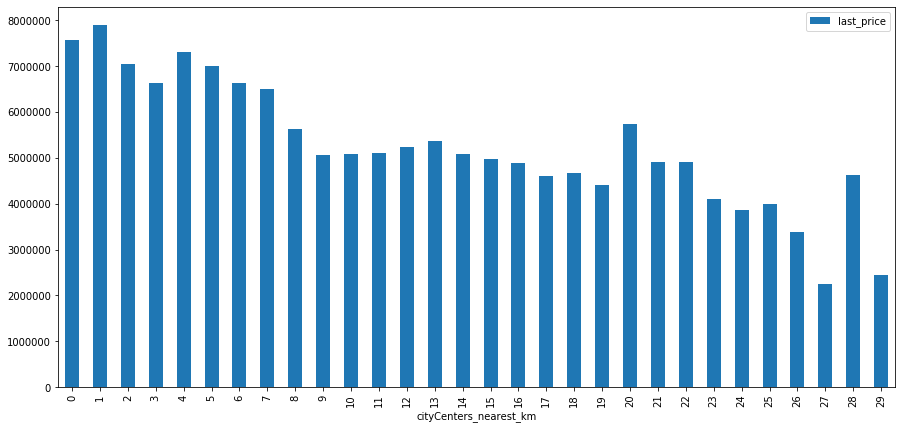

In [39]:
df_query['cityCenters_nearest_km'] = df_query['cityCenters_nearest'] / 1000
df_query['cityCenters_nearest_km'] = df_query['cityCenters_nearest_km'].astype('int')
spb = df_query.query('locality_name == "Санкт-Петербург"')
spb.groupby('cityCenters_nearest_km').agg({'last_price' : 'mean'}).sort_values(by='cityCenters_nearest_km').plot(kind='bar', figsize=(15,7))

In [40]:
spb_center = spb.query('cityCenters_nearest_km <= 8')
spb_uptown = spb.query('cityCenters_nearest_km > 8')
spb_center.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,last_price_mln,price_per_square_meter,weekday,month,year,floor_level,living_total_ratio,kitchen_total_ratio,cityCenters_nearest_km
24,8,6500000,97.2,2015-10-31,2,2.65,3,46.5,1,False,...,265.0,6.50,66872.43,5,10,2015,первый,0.478395,0.201646,2
70,9,3400000,30.0,2018-09-05,1,2.65,5,16.0,1,False,...,14.0,3.40,113333.33,2,9,2018,первый,0.533333,0.233333,8
94,3,3500000,29.5,2019-04-26,1,2.50,5,15.6,2,False,...,4.0,3.50,118644.07,4,4,2019,другой,0.528814,0.186441,7
99,32,9600000,90.0,2017-09-26,4,2.65,5,67.0,2,False,...,104.0,9.60,106666.67,1,9,2017,другой,0.744444,0.088889,2
111,4,4590000,40.0,2017-05-29,1,2.65,6,18.0,1,False,...,31.0,4.59,114750.00,0,5,2017,первый,0.450000,0.250000,6


### Вывод

Согласно графику средней цены за километр квартирами в центре могут считаться квартиры в пределах 8 км. В этом месте график сильно меняется, а значит это центральная зона.

### Анализ недвижимости в центре Санкт-Петербурга и в Санкт-Петербурге в целом

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7cbc088a50>,
      dtype=object)

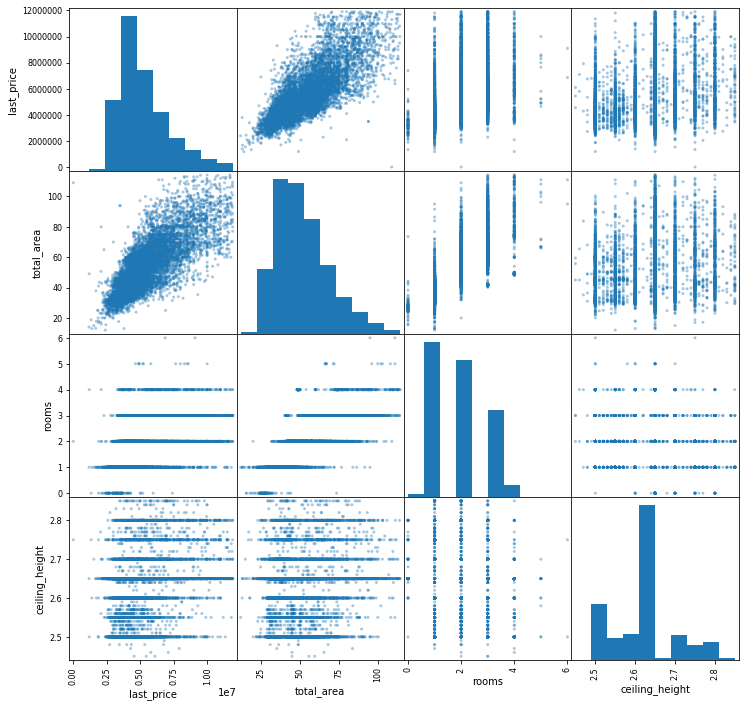

In [41]:
sbp_corr = pd.DataFrame(spb, columns=['last_price', 'total_area', 'rooms', 'ceiling_height']) #Построение матрицы корреляции для Санкт-Петербурга
pd.plotting.scatter_matrix(sbp_corr, alpha=0.4, figsize=(12, 12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7cb7c7e450>,
      dtype=object)

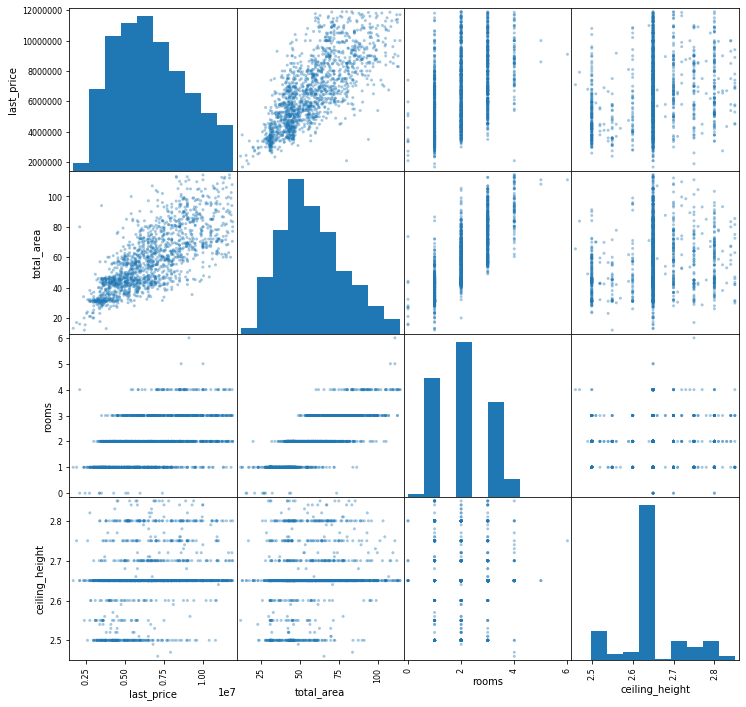

In [42]:
sbp_center_corr = pd.DataFrame(spb_center, columns=['last_price', 'total_area', 'rooms', 'ceiling_height']) #Построение матрицы корреляций для центра Санкт-Петербурга 
pd.plotting.scatter_matrix(sbp_center_corr, alpha=0.4, figsize=(12, 12))

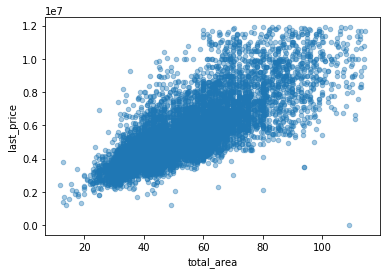

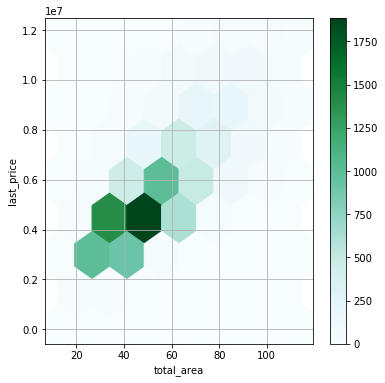

Для недвижимости в целом по Санкт-Петербургу коэффициент корреляции между total_area и last_price: 0.80.


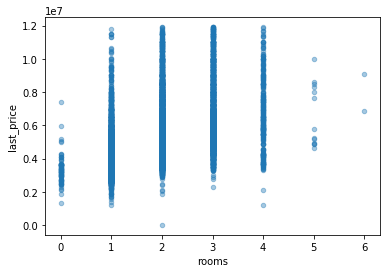

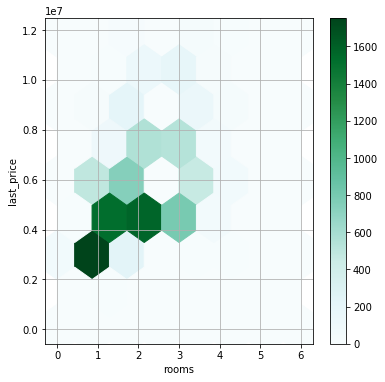

Для недвижимости в целом по Санкт-Петербургу коэффициент корреляции между rooms и last_price: 0.49.


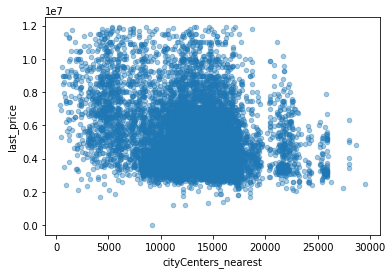

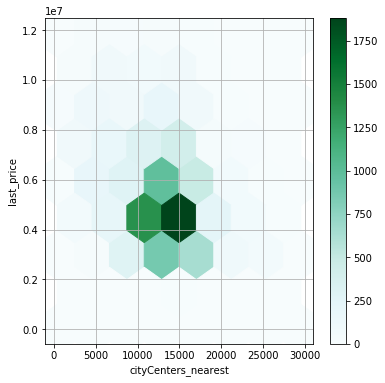

Для недвижимости в целом по Санкт-Петербургу коэффициент корреляции между cityCenters_nearest и last_price: -0.28.


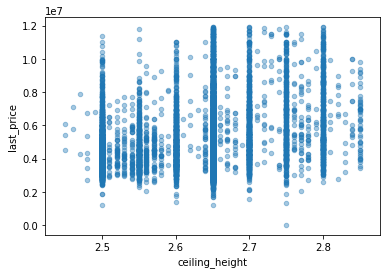

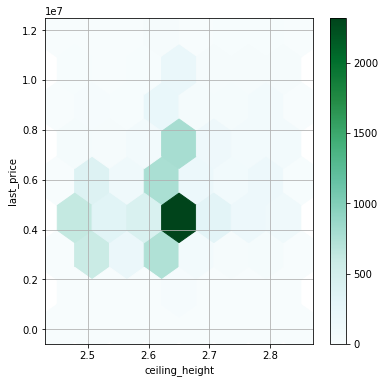

Для недвижимости в целом по Санкт-Петербургу коэффициент корреляции между ceiling_height и last_price: 0.27.


In [43]:
#Построение графиков и нахождение коэффициентов корреляции
columns_for_plot = ['total_area', 'rooms', 'cityCenters_nearest', 'ceiling_height']
for column in columns_for_plot:
    spb.plot(x=column, y='last_price', kind='scatter', alpha=0.4)
    plt.show()
    spb.plot(x=column, y='last_price', kind='hexbin', gridsize=7, figsize=(6, 6), sharex=False, grid=True)
    plt.show()
    print('Для недвижимости в целом по Санкт-Петербургу коэффициент корреляции между {} и {}: {:.2f}.'.format(column, 'last_price', spb[column].corr(spb['last_price'])))

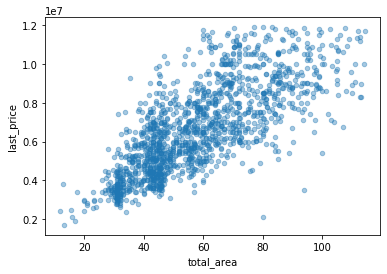

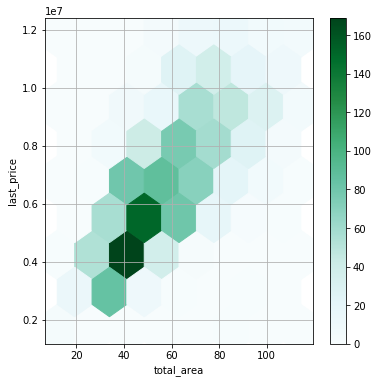

Для недвижимости в центре Санкт-Петербурга коэффициент корреляции между total_area и last_price: 0.75.


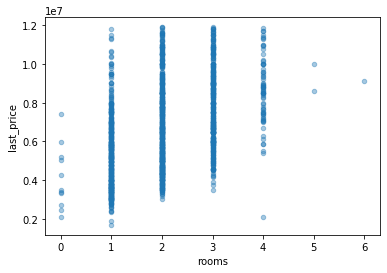

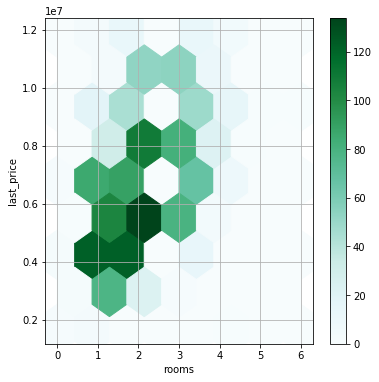

Для недвижимости в центре Санкт-Петербурга коэффициент корреляции между rooms и last_price: 0.45.


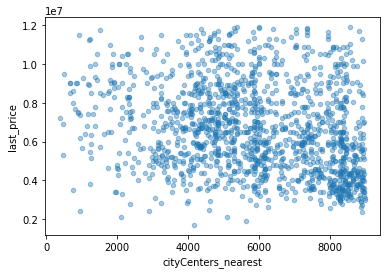

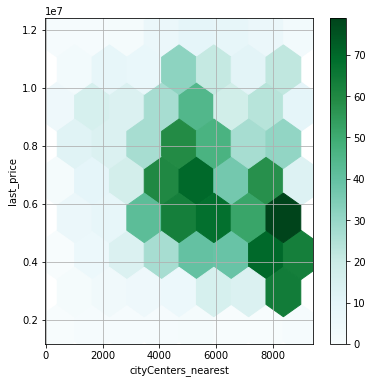

Для недвижимости в центре Санкт-Петербурга коэффициент корреляции между cityCenters_nearest и last_price: -0.24.


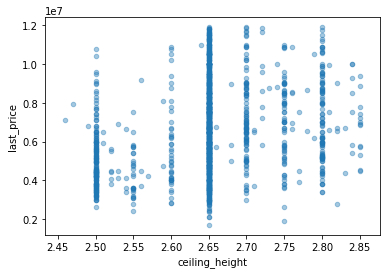

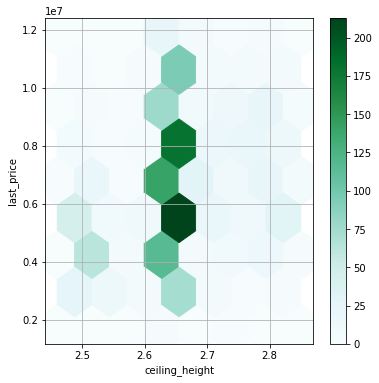

Для недвижимости в центре Санкт-Петербурга коэффициент корреляции между ceiling_height и last_price: 0.25.


In [44]:
for column in columns_for_plot:
    spb_center.plot(x=column, y='last_price', kind='scatter', alpha=0.4)
    plt.show()
    spb_center.plot(x=column, y='last_price', kind='hexbin', gridsize=7, figsize=(6, 6), sharex=False, grid=True)
    plt.show()
    print('Для недвижимости в центре Санкт-Петербурга коэффициент корреляции между {} и {}: {:.2f}.'.format(column, 'last_price', spb_center[column].corr(spb_center['last_price'])))

             last_price
floor_level            
первый          4277500
последний       4570000
другой          4900000


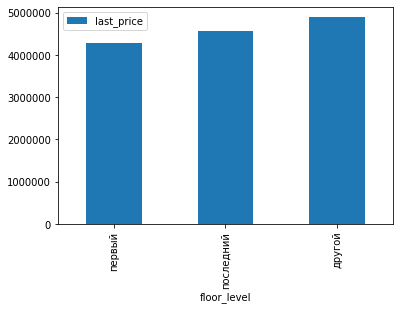

           last_price
weekday              
2        5.243173e+06
1        5.272411e+06
0        5.274182e+06
4        5.293334e+06
5        5.318780e+06
6        5.320937e+06
3        5.334041e+06


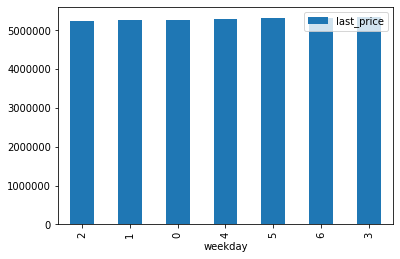

         last_price
month              
6      5.200437e+06
7      5.207744e+06
10     5.217141e+06
5      5.244141e+06
3      5.284685e+06
8      5.301830e+06
2      5.302545e+06
11     5.313294e+06
1      5.324876e+06
4      5.349323e+06
12     5.360905e+06
9      5.373241e+06


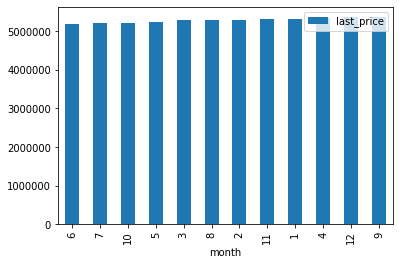

        last_price
year              
2016  5.234969e+06
2017  5.249276e+06
2015  5.283974e+06
2018  5.325503e+06
2019  5.427479e+06


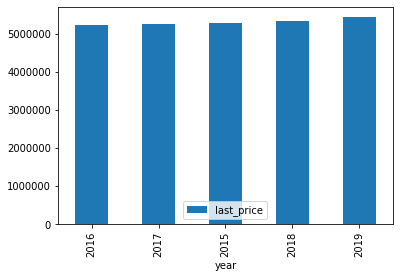

In [45]:
last_price_floor_level_spb =  spb.pivot_table(index='floor_level', values='last_price', aggfunc='median').sort_values(by = 'last_price')
last_price_weekday_spb =  spb.pivot_table(index='weekday', values='last_price', aggfunc='mean').sort_values(by = 'last_price')
last_price_month_spb =  spb.pivot_table(index='month', values='last_price', aggfunc='mean').sort_values(by = 'last_price')
last_price_year_spb =  spb.pivot_table(index='year', values='last_price', aggfunc='mean').sort_values(by = 'last_price')

data1_for_plot = [last_price_floor_level_spb, last_price_weekday_spb, last_price_month_spb, last_price_year_spb]
for data in data1_for_plot:
    data
    data.sort_values(by = 'last_price').plot(y='last_price', kind='bar')
    plt.show()

             last_price
floor_level            
первый          5050000
последний       6400000
другой          6700000


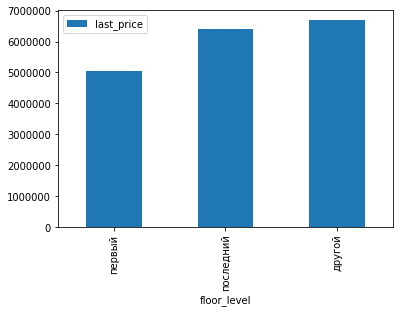

           last_price
weekday              
3        6.492837e+06
1        6.565537e+06
0        6.594434e+06
2        6.637380e+06
4        6.685733e+06
5        6.748914e+06
6        7.095168e+06


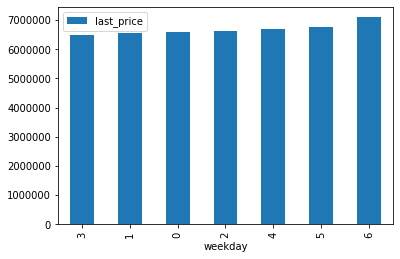

         last_price
month              
6      6.305328e+06
5      6.436050e+06
10     6.459647e+06
7      6.571853e+06
12     6.612279e+06
2      6.613866e+06
4      6.620218e+06
1      6.667978e+06
3      6.694526e+06
8      6.777641e+06
9      6.879861e+06
11     6.929522e+06


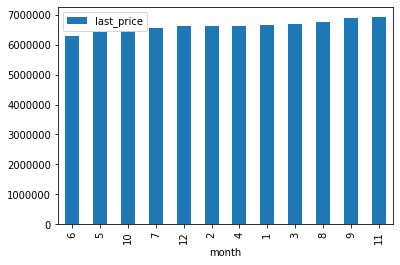

        last_price
year              
2019  6.377792e+06
2015  6.459148e+06
2018  6.565609e+06
2016  6.683181e+06
2017  6.727651e+06


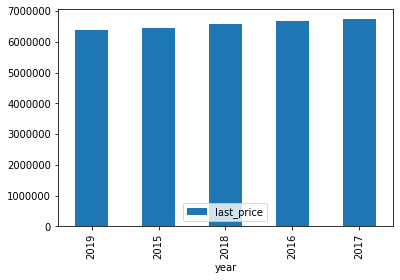

In [46]:
last_price_floor_level_spb_center =  spb_center.pivot_table(index='floor_level', values='last_price', aggfunc='median').sort_values(by = 'last_price')
last_price_weekday_spb_center =  spb_center.pivot_table(index='weekday', values='last_price', aggfunc='mean').sort_values(by = 'last_price')
last_price_month_spb_center =  spb_center.pivot_table(index='month', values='last_price', aggfunc='mean').sort_values(by = 'last_price')
last_price_year_spb_center =  spb_center.pivot_table(index='year', values='last_price', aggfunc='mean').sort_values(by = 'last_price')

data1_for_plot = [last_price_floor_level_spb_center, last_price_weekday_spb_center, last_price_month_spb_center, last_price_year_spb_center]
for data in data1_for_plot:
    print(data)
    data.sort_values(by = 'last_price').plot(y='last_price', kind='bar')
    plt.show()

### Вывод

В целом между квартирами в Санкт-Петербурге и в центре Санкт-Петербурга есть довольно сильные различия. 
Согласно графику диаграммы рассеяния между столбцами total_area и last_price можно заметить прямо пропорциональную зависимость между значениями. Коэффициент корреляции равен 0,8, что свидетельствует об сильной связи между двумя показателями в Санкт-Петербурге, в центре Санкт-Петербурга данное значение равно 0,75, что также свидетельствует о сильной связи между показателями. Наибольшее количество значений Для Санкт-петербурга находятся в области, где total_area равен 50, а last_price находится в облатси 5 млн. рублей (около 1750 значений). Для центра около 160 объектов находятся также в этих рамках.
Согласно графику диаграммы рассеяния между столбцами romms и last_price можно заметить, что в столбцах 1,2 и 3 комнатных квартир находится наибольшее количество квартир. Коэффициент корреляции для Санкт-Петербурга равен 0,49, что свидетельствует о слабой связи между двумя показателями, для центра коэффициент равен 0,45, что также свидетельствует о слабой связи. Наиболшее количество значений для Санкт-петербурга находятся в области, где rooms равен 1, а last_price находится в области 3,5 млн. рублей (более 1600 значений). Для центра города наибольшим значением (120 объектов) является двухкомнатные квартиры стоимость 5,8 млн рублей. 
Согласно графику диаграммы рассеяния между столбцами cityCenter_nearest и last_price можно заметить обратно пропорциональную зависимость между значениями. Коэффициент корреляции для Санкт-Петербурга равен -0,28, что свидетельствует об обратной слабой связи между двумя показателями. Наиболшее количество значений находятся в области, где cityCenter_nearest равен 15000 м, а last_price находится в облатси 5 млн. рублей (около 1750 значений). Для центра можно привести подобную статистику, где коэффициент корреляции равен -0,24, что также свидетельствует о слабой обратно пропорциональной связи между показателями. Все объекты расположены в целом равномерно, но выделяются около 70 объектов на расстоянии 8000 м и стоимостью 6 млн. руб.  
Согласно графику диаграммы рассеяния между столбцами ceiling_height и last_price можно заметить прямо пропорциональную зависимость между значениями. Коэффициент корреляции для Санкт-Петербурга равен 0,27, что свидетельствует о слабой связи между двумя показателями. Наиболшее количество значений находятся в области, где total_area равен 2.65, а last_price находится в облатси 5 млн. рублей (более 3000 значений). В центре ситуация практически аналогичная, о чем говорит коэффициент корреляции 0,25 (слабая связь показателей). Около 200 объектов недвижимости имеют стоимость 6 млн с высотой потолков 2,65 м. 

Согласно столбчатой диаграмме floor_level можно четко пронаблюдать, что на первом этаже в Санкт-Петербурге продаются квартиры с самой низкой стоимостью (4277500 рублей). Самыми высокими значениями обладают квартиры, находящиеся не на последнем и не на первом этаже 4900000 рублей. Для центра Санкт-Петербурга характерно такое же распределение. Наименьшая стоимость 5050000 на первом этаже. Для других этажей средняя стоимость 6700000. 
В среду размещаются объявления с самой низкой ценой объявлений в Санкт-Петербурге, а в четверг с самой высокой стоимостью. Для центра Санкт-Петербурга в четверг размещаются объявления с самой низкой стоимостью, в то время как в воскресенье размещались объявления с самой высокой стоимостью. 
Объявления с самыми высокими стоимостями недвижимостями, как в Санкт-Петербурге и центре Санкт-петербурга размещаются в коцне года в конце года и начале осеннего сезона в сентябре, объяснить это можно тем, что к концу года стоимость всего, в том числе квартир увеличивается. Стоимость квартир в 2019 году в Санкт-Петербурге самая высокая относительно других годов, что может объясняться тем, что после ЧМ по футболу состоялся приток инвестиций в жилую недвижимость. В центре как раз наоборот, в 2019 году стоимость квартир была низкой.

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Отличная визуализация.

Еще раз плюс, за такие развернутые выводы, молодец)
</div>

### Шаг 5. Общий вывод

В проекте были использованы различные средства обработки данных, были удалены пропуски, заменены типы данных, обработаны дубликаты, проведена лемматизация.
В исходных данных было 23699 значений по 22 столбцам, а также 14 столбцов с пропущенными значениями.
В рамках предобработки данных были заполнены значения в столбцах в зависимости от сущности данных столбцов. В каких-то столбцах были изменены данные на "0", в каких-то на медианное значения. 
После проведенной предобработки данных было произведено удаление выделяющихся и лишних значений согласно графикам и расчетам. Получили типичные выборочные наблюдения из генеральной совокупности. 
В рамках анализа выборочной совокупности выявлено, что на стоимость квартиры влияют 4 основных фактора total_area, ceiling_height, rooms, cityCenter_nearest. Самое большое влияние оказывает показатель общая площадь объекта. Это хорошо показывает как выборочная совокупность, так и анализ только Санкт-Петербурга и центра Санкт-Петербурга. В среднем влияние этого фактора сильное (коэффициент корреляции около 0,7). 
Квартиры в центре Сантк-Петербурга имеют большую стоимость, чем квартиры в целом в регионе и квартиры в Санкт-Петербурге, что логично, ведь Санкт-Петербург один из самых больших городов и является одной из "столиц" России. 
Также при анализе выялено, что коэффициенты корреляции, так же как и диаграммы рассеяния для Санкт-Петербурга и центра Санкт-Петербурга, примерно равны с показателями выборочной совокупности по региону. Это означает, что анализ произведен правильно и мы можем выводы распространять на генеральную совокупность. 

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [ ]  файлы изучены (выведены первые строки, метод info())
- [ ]  определены пропущенные значения
- [ ]  заполнены пропущенные значения
- [ ]  есть пояснение, какие пропущенные значения обнаружены
- [ ]  изменены типы данных
- [ ]  есть пояснение, в каких столбцах изменены типы и почему
- [ ]  посчитано и добавлено в таблицу: цена квадратного метра
- [ ]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [ ]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [ ]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [ ]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [ ]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [ ]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [ ]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [ ]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [ ]  в каждом этапе есть выводы
- [ ]  есть общий вывод

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Алексей, у тебя получилась отличная работа, еще раз хвалю. В целом, советую обратить внимания на комментарии не зеленого цвета, в будущем данные поправки сделают твои работы еще сильнее. Успехов тебе в дальнейшей учебе!
    
Если остались какие-то вопросы, буду рад ответить на них!)
    
P.S. Подправь оглавление)
</div>